# A Cournot competition model with product differentiation
## Model Project
### Group: Anders&Frederik    
#### Group members: Frederik Andresen, rjv586. Anders Meelby, zpw586.



**The model**    
Consider two firms who compete in the same market i.e. a duopoly. The market is characterized by Cournot competetion:    

- The firms are competing in quantities they produce; 
- The firms decide the quantities independently of each other and simultaneously;
- The firms do not coorperate (no collusion); 
- The firms have market power why each firm's output decision affects the price of each firm's good;
- The firms are economically rational and act strategically to maximize their profit given their competitors' decisions. 

**Demand/price**   

We define the inverse demand (price) for firm $i$ in such a market:   
$p_i=p(x_i+x_j)=1-x_i+b\cdot x_j,$ for each $i\neq j \in \{1,2\},$   
where $x_1$ is production by firm 1, $x_2$ is production by firm 2, and $b$ is a positive constant determining the elasticity of substitution between the goods. Letting $b=1$ makes the goods perfect substitutes and $b<1$ makes the goods differentiated.

In [2]:
# 1.1 Define price/demand
def demand(x1,x2,b):
    return 1-x1-b*x2

**Cost**   
Both firms have the cost functions, $C(x_i)=cx_i$ for $i=1,2$ such that the marginal costs are constant, $\dfrac{\partial C(x_i)}{\partial x_i}=c_i.$

In [3]:
# 1.2 Define costs
def cost(x,c): #c(x==0)=0
    if x == 0: 
     cost = 0
    else:
     cost = c*x
    return cost 

**Profit**    
The profit of firm $i$ can be stated as the following:   
$\pi_i(x_i,x_j) = p_i(x_i,x_j)x_i-C(x_i)$   for each $i\neq j \in \{1,2\}$

In [4]:
# 1.3 Define profits
def profit(x1,x2,c1,b):
    return demand(x1,x2,b)*x1 - cost(x1,c1)

**Best response**   
Firm $i$ chooses its quantity, $x_i$, as to maximize profits, taking $x_j$ as given. $(x_i^*,x_j^*)$ is therefore a Nash equillibrium if $x_i^*=\underset{x_i}{\textrm{arg max}} \pi_i(x_i,x_j^*)$ for each $i\neq j \in{1,2}$. 
If the profit is concave in output, the Nash equillibrium $(x_i^*,x_j^*)$ is the solution to $\frac{\partial \pi_i(x_i,x_j}{\partial x_i}|_{x_i=x_i^*,x_j=x_j^*} = 0$.     

Isolating the profit maximizing quantity $x_i^*$ yields the best response function, $x_i^*=R_{x_i}(x_j^*)$.   
To define this function, we use scipy brute force where the optimization problem per default is a minimization problem. Thus, if we want to maximize the profit of firm i, $\pi_i(x_i,x_j)$, we need to minimize $-\pi_i(x_i,x_j)$.    
The method evaluates $-\pi_i(x_i,x_j)$ for each value of $x_i$ in the given range in order to find the global minimum. We set this particular range of 0 to 1 for our results to be well-defined.   
The best response functions:

In [18]:
from scipy import optimize

# 1.4 Define best response function of both firms using lambda and optimize.brute
def reaction(x2,c,b):
    x1 = optimize.brute(lambda x: -profit(x,x2,c,b), #brute minimizes the function
                        ranges=((0,1),), #x1,x2 can take on values between 0 and 1.
                        finish=optimize.fmin) #Minimize a function using the downhill simplex algorithm
    return x1[0] 

**Finding the equilibrium by numerical optimization**   
Having defined the best repsonse function as a function of the other firms choice of quantity and the parameters, we need to set up a system of equations, which ensures that both firms are responding optimally given the other firms choice of quantity. We define two vectors in order to satisfy this condition.    
The first vector, $x^* = \begin{pmatrix}x_1^* \\x_2^* \end{pmatrix}$, is the Nash equillibrium, and the other being each firms reaction function given the 
other firms choice of quantity, $f(x^*) = \begin{pmatrix}r_1(x_2^*) \\r_2(x_1^*) \end{pmatrix}$.    
The Nash equillibrium, $x^*$ must satisfy that $x^* = f(x^*) \Leftrightarrow x^* - f(x^*) = 0$.    
This is just another way of stating that both firms are responding optimally and therefore have no incentive to deviate. We define a function, vector_reaction, which is passed an initial quantity for each firm as well as a set of parameters. vector_reaction keeps changing quantities untill both firms has maximized profits i.e when $x^* - f(x^*) = 0$.   
The equilibrium condition in vectorized form (array):


In [19]:
from numpy import array

# 1.5 Define best responses as an array
def vector_reaction(x,param): # vector param = (b,c1,c2)
    return array(x)-array([reaction(x[1],param[1],param[0]),  #x1 = reaction(x2,c1,b)
                           reaction(x[0],param[2],param[0])]) #x2 = reaction(x1,c2,b)

We can solve for the profit maximizing quantity using Scipy's "fsolve", which can solve a vectorized system of equations using an initial guess and the parameter values.   
The first case is the one with perfect substitutes (b=1), the next is imperfect substitutes (b=0.5) and the last is perfect complements (b=0). Finally, we print the Nash equilibrium quantity and -profit.

In [20]:
from IPython.display import Markdown, display #Creating Markdown-like printing for better visuals
def printmd(string):
    display(Markdown(string))

# 1.6 Print results
x0 = [0.3, 0.3] #initial guess
xstar_perf_substitutes = optimize.fsolve(vector_reaction, x0, args = ([1,0,0])) #(b=1,c1=0,c2=0) (perfect substitutes)
printmd('**Perfect substitutes (b=1)**')
printmd(f'The Nash equilibrium quantity for both firms, $x^*=[x_1^*,x_2^*]$ = {xstar_perf_substitutes}')
printmd(f'The Nash equilibrium price for both firms, $p^*$ = {demand(xstar_perf_substitutes[0],xstar_perf_substitutes[1],1)}')
printmd(f'The Nash equilibrium profit for both firms, $\pi^*$= {profit(xstar_perf_substitutes[0],xstar_perf_substitutes[1],0,1)}')

x00 = [0.6, 0.6] #initial guess
xstar_imperfect_substitutes = optimize.fsolve(vector_reaction, x00, args = ([0.5,0,0])) #(b=0.5,c1=0,c2=0) (imperfect substitutes)
printmd('**Imperfect substitutes (b=0.5)**')
printmd(f'The Nash equilibrium quantity for both firms, $x^* =[x_1^*,x_2^*]$ = {xstar_imperfect_substitutes}')
printmd(f'The Nash equilibrium price for firm 1 and 2, $p^*$= {demand(xstar_imperfect_substitutes[0],xstar_imperfect_substitutes[1],0.5)}')
printmd(f'The Nash equilibrium profit for firm 1 and 2, $\pi^*$= {profit(xstar_imperfect_substitutes[0],xstar_imperfect_substitutes[1],0,0.5)}')

x000 = [0.5, 0.5] #initial guess
xstar_perf_complements = optimize.fsolve(vector_reaction, x000, args = ([0,0,0])) #(b=0,c1=0,c2=0) (perfect complements)
printmd('**Perfect complements  (b=0)**')
printmd(f'The Nash equilibrium quantity for both firms, $x^*=[x_1^*,x_2^*]$ = {xstar_perf_complements}') 
printmd(f'The Nash equilibrium price for both firms, $p^*$= {demand(xstar_perf_complements[0],xstar_perf_complements[1],0.5)}')
printmd(f'The Nash equilibrium profit for both firms,  $\pi^*$= {profit(xstar_perf_complements[0],xstar_perf_complements[1],0,0)}')


**Perfect substitutes (b=1)**

The Nash equilibrium quantity for both firms, $x^*=[x_1^*,x_2^*]$ = [0.33332648 0.33332648]

The Nash equilibrium price for both firms, $p^*$ = 0.3333470347232139

The Nash equilibrium profit for both firms, $\pi^*$= 0.11111339458222716

**Imperfect substitutes (b=0.5)**

The Nash equilibrium quantity for both firms, $x^* =[x_1^*,x_2^*]$ = [0.4 0.4]

The Nash equilibrium price for firm 1 and 2, $p^*$= 0.39999999997022395

The Nash equilibrium profit for firm 1 and 2, $\pi^*$= 0.15999999999602987

**Perfect complements  (b=0)**

The Nash equilibrium quantity for both firms, $x^*=[x_1^*,x_2^*]$ = [0.49995888 0.49995888]

The Nash equilibrium price for both firms, $p^*$= 0.25006167763157905

The Nash equilibrium profit for both firms,  $\pi^*$= 0.24999999830927547

The equilibrium quantity, -price and profit get higher as the products become more differentiated.

The analytical solution is symmetrical as well (c=0):    $x^*=\dfrac{1}{2+b}=p^*$, and, $\pi^*=\dfrac{1+2b}{(2+b)^2}$,
and checks out with the results above.

**Vizualizing the best response functions**    

Intersection, $x^*$=([0.33233233],[0.33233233])

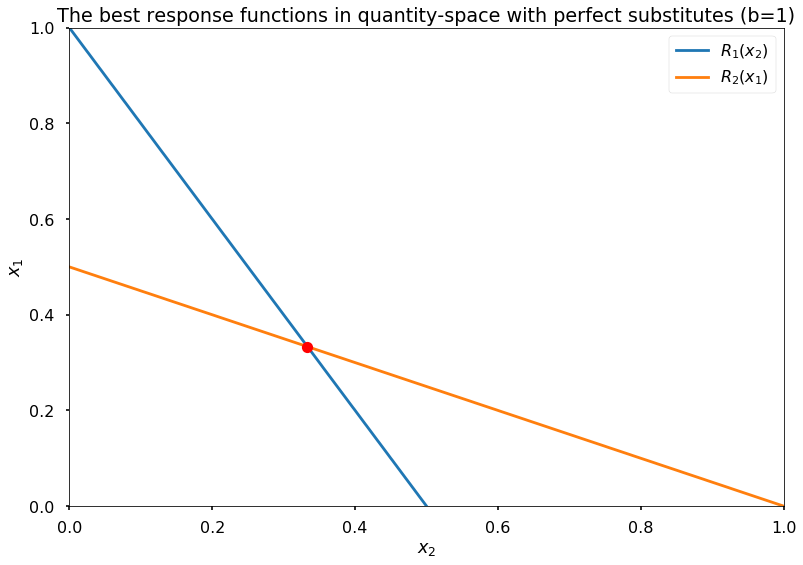

Intersection, $x^*$=([0.3993994],[0.3993994])

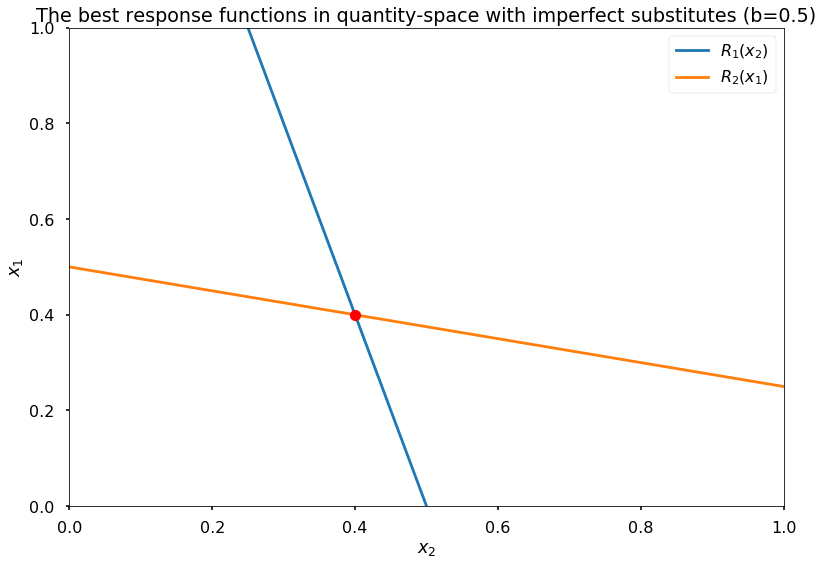

Intersection, $x^*$=([0.4994995],[0.4994995])

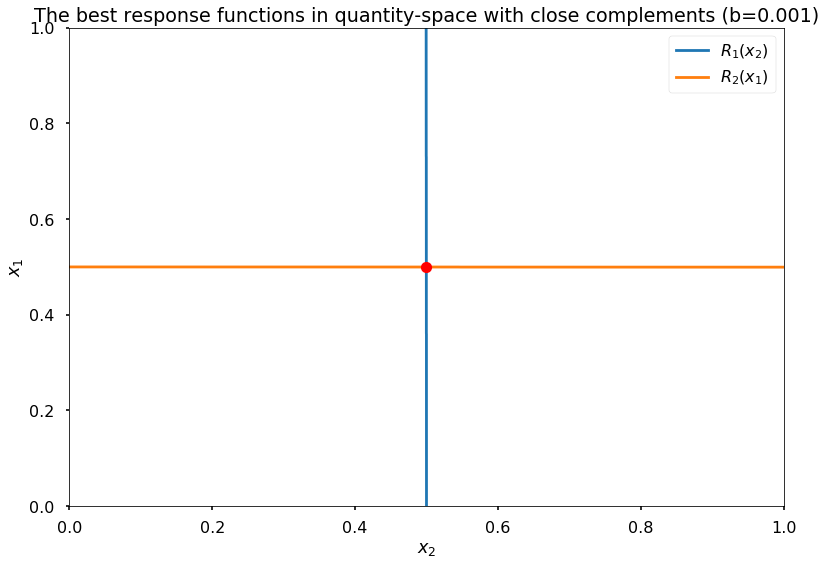

In [26]:
import sympy as sy
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-poster')

# 2.1 Create list of three parameter values and figure titles
b_list = [1, 0.5, 0.001]
title_list = ["The best response functions in quantity-space with perfect substitutes (b=1)", "The best response functions in quantity-space with imperfect substitutes (b=0.5)","The best response functions in quantity-space with close complements (b=0.001)"]

# 2.2 Two loops through two lists for the parameter b and figure titles, respectively
for b, t in zip(b_list,title_list): #Use zip to loop one list at time    

    # 2.3 Define array of quantities and storage vectors
    N=1000 #Number of points in linspace
    q_vec = np.linspace(0, 1, N)#Creating an equal spaced interval from 0 to 1, i.e. 0.000, 0.001,...0.999,1.000
    q1_vec = np.empty(N) #Empty array of shape=N=1000
    q2_vec = np.empty(N) 

    # 2.4 Loop through the 1000 quantities in q_vec and get R_i(x_j) for each firm
    for i,x2 in enumerate(q_vec):
        cord1 = q1_vec[i] = reaction(x2,0,b)
    for i,x1 in enumerate(q_vec):
        cord2 = q2_vec[i] = reaction(x1,0,b)

    # 2.5 Plot equilibrium quantity given b
    plt.title(t)
    plt.xlabel('$x_2$')
    plt.ylabel('$x_1$')
    plt.plot(q1_vec, q_vec, '-', label='$R_1(x_2)$')
    plt.plot(q_vec, q2_vec, '-', label='$R_2(x_1)$')
    plt.legend(loc='best')
    plt.xlim(0,1)
    plt.ylim(0,1)
    p = np.argwhere(np.diff(np.sign(q_vec - q1_vec))).flatten() #Create intersection points: np.signs is used to calculate differences, np.diff reveals the position of line cross and np.argwhere the exact indices
    plt.plot(q_vec[p], q_vec[p], 'ro')
    printmd(f'Intersection, $x^*$=({q_vec[p]},{q_vec[p]})') #Print intersection
    plt.show()

In the two first graphs both best responses are decreases in the rival firm's quantity: If one firm raises its output it is optimal for the other firm to reducer its output ("Strategic substitutes"). 
At (near) perfect complements, the optimal output is (near) independent of the rival firm's output.

**Plotting the parameter $b$ against equilibrium quantity, -price and profit.**

C:\Users\Frederik\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\Frederik\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<function matplotlib.pyplot.show(*args, **kw)>

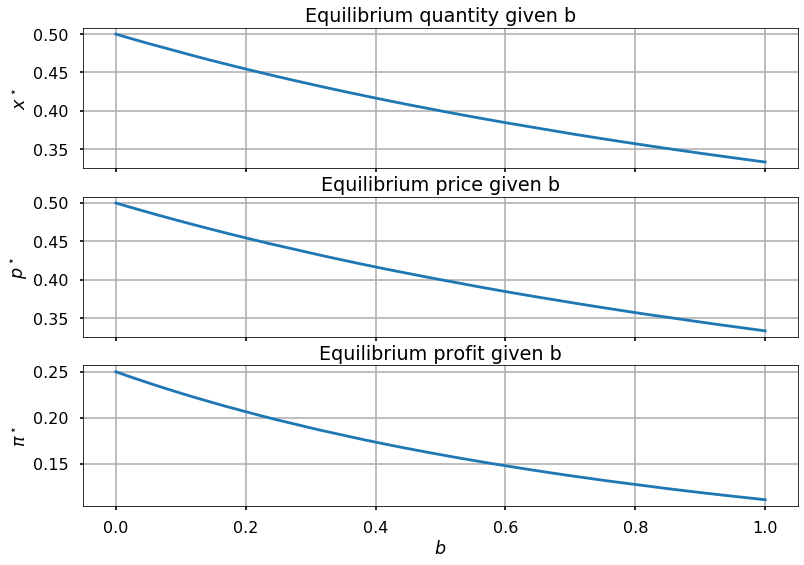

In [27]:
# 3.1 Define data for b and storage vectors
b_vec = np.linspace(0, 1, N) #Creating an equal spaced interval from 0 to 1, i.e. 0.000, 0.001,...0.999,1.000
x1_vec = np.empty(N) #Empty array of shape=N=1000
x2_vec = np.empty(N) 
price_vec = np.empty(N) 
pi_vec = np.empty(N)

# 3.2 Define solver from the vectorized equilibrium condition for b to loop through
def solver(b):
    return optimize.fsolve(vector_reaction, [0.5,0.5], args = ([b,0,0])) #[0.5,0.5] is initial guess

# 3.3 Let b loop through the solver and get optimal quantity, -price and -profit of firm 1 for each b (price and profit of firm 2 are commented out)
for i,b in enumerate(b_vec):
    cord = solver(b)
    x1_vec[i] = cord[0] #x1* given each b in the equal spaced interval
    x2_vec[i] = cord[1] #x2* given each b in the equal spaced interval
    price_vec[i] = demand(x1_vec[i],x2_vec[i],b) #profit(x1*,x2*,b)
#    price_vec[i] = demand(x2_vec[i],x1_vec[i],b) #profit(x2*,x1*,b)
    pi_vec[i] = profit(x1_vec[i],x2_vec[i],0,b) #profit(x1*,x2*,c1=0,b)
#    pi_vec[i] = profit(x2_vec[i],x1_vec[i],0,b) #profit(x2*,x1*,c2=0,b)



# 3.4 Plot equilibrium quantity given b
fig, (ax_0, ax_1, ax_2) = plt.subplots(3, sharex=True) #They share the same x-axis

ax_0.plot(b_vec,x1_vec)

ax_0.set_title('Equilibrium quantity given b')
ax_0.set_ylabel('$x^\star$')
ax_0.grid(True)


# 3.5 Plot equilibrium price given b

ax_1.plot(b_vec,price_vec)

ax_1.set_title('Equilibrium price given b')
ax_1.set_ylabel('$p^\star$')
ax_1.grid(True)


# 3.5 Plot equilibrium profit given b

ax_2.plot(b_vec,pi_vec)

ax_2.set_title('Equilibrium profit given b')
ax_2.set_xlabel('$b$')
ax_2.set_ylabel('$\pi^\star$')
ax_2.grid(True)


plt.show

The equilibrium quantity and price are equal as previously stated.    
The equilibrium quantity, -price and profit get lower as the products become less differentiated.     